# Applied Data Analysis Course Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns= 163
pd.options.display.max_rows=163

## B. Manipulating the data

In [2]:
df = pd.read_csv('/data/ml_course/02_Data_Analysis/en.openfoodfacts.org.products.csv', index_col=0, parse_dates=[4, 6])
df.head()

,code,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,brands,categories_en,origins,manufacturing_places,labels,emb_codes,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_en,ingredients_text,allergens,allergens_en,traces_en,serving_size,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states_en,main_category_en,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2,4559,usda-ndb-import,1489069957,2017-03-09 14:32:37+00:00,1489069957,2017-03-09 14:32:37+00:00,Peanuts,Unknown,Unknown,Unknown,Torn & Glasser,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",Unknown,Unknown,Unknown,28 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,b,Unknown,Unknown,"To be completed,Nutrition facts completed,Ingr...",Unknown,1941.0,NaN,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,60.71,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,16087,usda-ndb-import,1489055731,2017-03-09 10:35:31+00:00,1489055731,2017-03-09 10:35:31+00:00,Organic Salted Nut Mix,Unknown,Unknown,Unknown,Grizzlies,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,"Organic hazelnuts, organic cashews, organic wa...",Unknown,Unknown,Unknown,28 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,d,Unknown,Unknown,"To be completed,Nutrition facts completed,Ingr...",Unknown,2540.0,NaN,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.86,3.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,1.22428,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,16094,usda-ndb-import,1489055653,2017-03-09 10:34:13+00:00,1489055653,2017-03-09 10:34:13+00:00,Organic Polenta,Unknown,Unknown,Unknown,Bob's Red Mill,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,Organic polenta,Unknown,Unknown,Unknown,35 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,"To be completed,Nutritio

### Topic 1

Investigate the macronutrient breakdown across various foods (this is the percentage of calories that come from the 3 macronutrient groups: carbohydrates, protein and fats). What are the foods that have the highest ratios of each macronutrient? What are the foods that are most balanced? What is the macronutrient breakdown across different countries? Can you notice some trends or insights about the data?

## Keep only relevant columns for the task

In [3]:
df2 = df.loc[:, ['product_name', 'countries_en', 'fat_100g', 'carbohydrates_100g', 'proteins_100g']]
df2.head()

,product_name,countries_en,fat_100g,carbohydrates_100g,proteins_100g
2,Peanuts,United States,17.86,60.71,17.86
3,Organic Salted Nut Mix,United States,57.14,17.86,17.86
4,Organic Polenta,United States,1.43,77.14,8.57
5,Breadshop Honey Gone Nuts Granola,United States,18.27,63.46,13.46
6,Organic Long Grain White Rice,United States,NaN,80.00,8.89


In [4]:
df2.isna().sum()

product_name             0
countries_en             0
fat_100g              4232
carbohydrates_100g    4458
proteins_100g         4439
dtype: int64

In [5]:
df2.shape

(262050, 5)

In [6]:
# drop rows that do not contain information
df2.dropna(inplace=True)
df2.isna().sum()

product_name          0
countries_en          0
fat_100g              0
carbohydrates_100g    0
proteins_100g         0
dtype: int64

In [7]:
df2.shape

(255994, 5)

In [8]:
df2['total'] = df2.fat_100g+df2.carbohydrates_100g+df2.proteins_100g
df2.sort_values(by='total', ascending=False, inplace=True)
df2.head()

,product_name,countries_en,fat_100g,carbohydrates_100g,proteins_100g,total
56245,Coffee & Milk Creamer,United States,100.0,66.67,66.67,233.34
56218,Cafe Collection Coffee & Milk Creamer,United States,75.0,87.50,50.00,212.50
156242,"Markets, Soft Cherry Candy Balls",United States,100.0,100.00,0.00,200.00
170561,Sprinkles,United States,0.0,100.00,100.00,200.00
151731,Tcho-A-Day Dark Chocolate,United States,35.0,55.00,100.00,190.00


In [9]:
# Check how many entries have a total larger than 100g
df2.total[df2.total > 100.].size

1829

In [10]:
# keep only entries that have a total smaller than 100g
df2 = df2[df2.total <= 100]
df2.shape

(254165, 6)

In [11]:
cols = df2.columns[2:5]
for col in cols:
    df2[col+'_percent'] = df2[col]/df2['total']*100.
df2.head()

,product_name,countries_en,fat_100g,carbohydrates_100g,proteins_100g,total,fat_100g_percent,carbohydrates_100g_percent,proteins_100g_percent
9916,"Alaga, The Original Cane Flavor Syrup, Cane",United States,0.0,100.0,0.0,100.0,0.0,100.0,0.0
316588,Sucre glace,Switzerland,0.0,100.0,0.0,100.0,0.0,100.0,0.0
37766,Ring Pop,United States,0.0,100.0,0.0,100.0,0.0,100.0,0.0
37779,"Ringpop, Halloween Ring Pops, Strawberry, Wate...",United States,0.0,100.0,0.0,100.0,0.0,100.0,0.0
9634,Lemon Drops,United States,0.0,100.0,0.0,100.0,0.0,100.0,0.0


### Highest ratio of macronutrient

In [12]:
df2.sort_values(by=['fat_100g_percent', 'fat_100g'], ascending=[False, False]).head(20)

,product_name,countries_en,fat_100g,carbohydrates_100g,proteins_100g,total,fat_100g_percent,carbohydrates_100g_percent,proteins_100g_percent
170592,Macadamia Oil,United States,100.0,0.0,0.0,100.0,100.0,0.0,0.0
273846,Saindoux pur porc Extra,France,100.0,0.0,0.0,100.0,100.0,0.0,0.0
93125,"Academia Barilla, Toscano Extra Virgin Olive Oil",United States,100.0,0.0,0.0,100.0,100.0,0.0,0.0
97346,Vegetable Oil,United States,100.0,0.0,0.0,100.0,100.0,0.0,0.0
19241,"Butcher Boy, Clear Liquid Shortening",United States,100.0,0.0,0.0,100.0,100.0,0.0,0.0
97347,Corn Oil,United States,100.0,0.0,0.0,100.0,100.0,0.0,0.0
170653,Raw Cacao Butter,United States,100.0,0.0,0.0,100.0,100.0,0.0,0.0
38015,Pure Vegetable Oil,United States,100.0,0.0,0.0,100.0,100.0,0.0,0.0
36225,Extra Virgin Olive Oil,United States,100.0,0.0,0.0,100.0,100.0,0.0,0.0
97344,Corn Oil,United States,100.0,0.0,0.0,100.0,100.0,0.0,0.0


In [13]:
df2.sort_values(by=['carbohydrates_100g_percent', 'carbohydrates_100g'], ascending=[False, False]).head(20)

,product_name,countries_en,fat_100g,carbohydrates_100g,proteins_100g,total,fat_100g_percent,carbohydrates_100g_percent,proteins_100g_percent
9916,"Alaga, The Original Cane Flavor Syrup, Cane",United States,0.0,100.0,0.0,100.0,0.0,100.0,0.0
316588,Sucre glace,Switzerland,0.0,100.0,0.0,100.0,0.0,100.0,0.0
37766,Ring Pop,United States,0.0,100.0,0.0,100.0,0.0,100.0,0.0
37779,"Ringpop, Halloween Ring Pops, Strawberry, Wate...",United States,0.0,100.0,0.0,100.0,0.0,100.0,0.0
9634,Lemon Drops,United States,0.0,100.0,0.0,100.0,0.0,100.0,0.0
37770,Candy,United States,0.0,100.0,0.0,100.0,0.0,100.0,0.0
37768,Mini Candy,United States,0.0,100.0,0.0,100.0,0.0,100.0,0.0
170566,Sprinkles,United States,0.0,100.0,0.0,100.0,0.0,100.0,0.0
170565,Pink Sugar,United States,0.0,100.0,0.0,100.0,0.0,100.0,0.0
9605,"The Original Candy Canes, Peppermint",United States,0.0,100.0,0.0,100.0,0.0,100.0,0.0


In [14]:
df2.sort_values(by=['proteins_100g_percent', 'proteins_100g'], ascending=[False, False]).head(20)

,product_name,countries_en,fat_100g,carbohydrates_100g,proteins_100g,total,fat_100g_percent,carbohydrates_100g_percent,proteins_100g_percent
71739,Unflavored Gelatin,United States,0.0,0.0,100.00,100.00,0.0,0.0,100.0
229675,Proteines te soja texturees grosse,France,0.0,0.0,100.00,100.00,0.0,0.0,100.0
41366,Gelatin,United States,0.0,0.0,100.00,100.00,0.0,0.0,100.0
41365,Unflavored Gelatin,United States,0.0,0.0,100.00,100.00,0.0,0.0,100.0
90840,Garlic Powder,United States,0.0,0.0,100.00,100.00,0.0,0.0,100.0
2919,Unflavored Gelatin,United States,0.0,0.0,100.00,100.00,0.0,0.0,100.0
180645,Blattgelatine weiss,Germany,0.0,0.0,86.00,86.00,0.0,0.0,100.0
37562,Gelatine,United States,0.0,0.0,85.71,85.71,0.0,0.0,100.0
311452,100% Whey Isolate,France,0.0,0.0,84.00,84.00,0.0,0.0,100.0
6733,Bonito Shavings Katsuobushi Pack Soft,United States,0.0,0.0,80.00,80.00,0.0,0.0,100.0


### Most balanced

In [15]:
df2['deviation'] = abs(df2.fat_100g_percent-33.333333)+abs(df2.carbohydrates_100g_percent-33.33333)+abs(df2.proteins_100g_percent-33.3333)

In [16]:
df2.sort_values(by=['deviation', 'fat_100g', 'carbohydrates_100g', 'proteins_100g'], ascending=[True, False, False, False]).head(20)

,product_name,countries_en,fat_100g,carbohydrates_100g,proteins_100g,total,fat_100g_percent,carbohydrates_100g_percent,proteins_100g_percent,deviation
6704,Prepared Sesame Seed & Seaweed (Nori Goma Furi...,United States,33.33,33.33,33.33,99.99,33.333333,33.333333,33.333333,0.000037
103321,Celery Salt,United States,33.33,33.33,33.33,99.99,33.333333,33.333333,33.333333,0.000037
91479,"El Jalapeno, Flax Seed",United States,33.33,33.33,33.33,99.99,33.333333,33.333333,33.333333,0.000037
103806,Organic Flax Seed,United States,29.41,29.41,29.41,88.23,33.333333,33.333333,33.333333,0.000037
167611,Uncured Bacon Bits,United States,28.57,28.57,28.57,85.71,33.333333,33.333333,33.333333,0.000037
98293,Salad Toppings Bits,United States,28.57,28.57,28.57,85.71,33.333333,33.333333,33.333333,0.000037
300516,Vegan Protein Bar,France,26.00,26.00,26.00,78.00,33.333333,33.333333,33.333333,0.000037
81747,Prepared Shredded Salmon And Cod Roe,United States,25.00,25.00,25.00,75.00,33.333333,33.333333,33.333333,0.000037
81749,Vegetable Mix Furikake,United States,25.00,25.00,25.00,75.00,33.333333,33.333333,33.333333,0.000037
16192,Cream Cheese,United States,25.00,25.00,25.00,75.00,33.333333,33.333333,33.333333,0.000037


### Macronutrient breakdown among different countries

In [17]:
countries = df2.countries_en
countries = countries.str.split(',', expand=True)
countries = countries.stack().to_frame(name='country')
countries['value'] = 1
unique_countries = countries.groupby('country').sum()
unique_countries.sort_values(by='value', ascending=False, inplace=True)
unique_countries

,value
country,
United States,164706
France,72034
Switzerland,6221
Germany,5160
Spain,3421
United Kingdom,1940
Belgium,1320
Portugal,501
Australia,497


In [18]:
unique_countries.drop(index=['', 'Unknown'], inplace=True)

In [19]:
df3 = df2.loc[:, 'countries_en':'total']
df3.head()

,countries_en,fat_100g,carbohydrates_100g,proteins_100g,total
9916,United States,0.0,100.0,0.0,100.0
316588,Switzerland,0.0,100.0,0.0,100.0
37766,United States,0.0,100.0,0.0,100.0
37779,United States,0.0,100.0,0.0,100.0
9634,United States,0.0,100.0,0.0,100.0


In [20]:
df_list = []
for country in unique_countries.index[:20]:
    print(country)
    df_aux = df3[df3.countries_en.str.contains(country)].copy()
    df_aux['countries_en'] = country
    df_list.append(df_aux)
df_countries = pd.concat(objs=df_list).sort_values(by='countries_en')
df_countries.head()

United States
France
Switzerland
Germany
Spain
United Kingdom
Belgium
Portugal
Australia
Italy
Russia
Netherlands
Serbia
Sweden
Canada
Denmark
Guadeloupe
Austria
Mexico
Réunion


,countries_en,fat_100g,carbohydrates_100g,proteins_100g,total
355199,Australia,0.0,84.0,0.5,84.5
355403,Australia,1.0,19.9,25.4,46.3
189783,Australia,6.3,30.5,9.7,46.5
354523,Australia,11.6,25.5,9.5,46.6
295294,Australia,16.0,27.5,3.1,46.6


In [21]:
df_total = df_countries.groupby('countries_en').sum()
df_total.head()

,fat_100g,carbohydrates_100g,proteins_100g,total
countries_en,,,,
Australia,5623.3290,13327.7490,3196.7170,22147.7950
Austria,1136.6300,3103.2100,655.9300,4895.7700
Belgium,18902.3159,42044.1029,8372.0739,69318.4927
Canada,2894.5770,7868.8530,1518.6012,12282.0312
Denmark,2702.5500,4815.6000,1163.3400,8681.4900


In [22]:
cols = df_total.columns[:3]
for col in cols:
    df_total[col+'_percent'] = df_total[col]/df_total['total']*100.
df_total.head()

,fat_100g,carbohydrates_100g,proteins_100g,total,fat_100g_percent,carbohydrates_100g_percent,proteins_100g_percent
countries_en,,,,,,,
Australia,5623.3290,13327.7490,3196.7170,22147.7950,25.390017,60.176415,14.433568
Austria,1136.6300,3103.2100,655.9300,4895.7700,23.216573,63.385535,13.397892
Belgium,18902.3159,42044.1029,8372.0739,69318.4927,27.268792,60.653516,12.077692
Canada,2894.5770,7868.8530,1518.6012,12282.0312,23.567576,64.068010,12.364414
Denmark,2702.5500,4815.6000,1163.3400,8681.4900,31.130025,55.469741,13.400234


In [23]:
df_total = df_total.sort_values(by=['fat_100g_percent', 'carbohydrates_100g_percent', 'proteins_100g_percent'], ascending=[False, False, False])

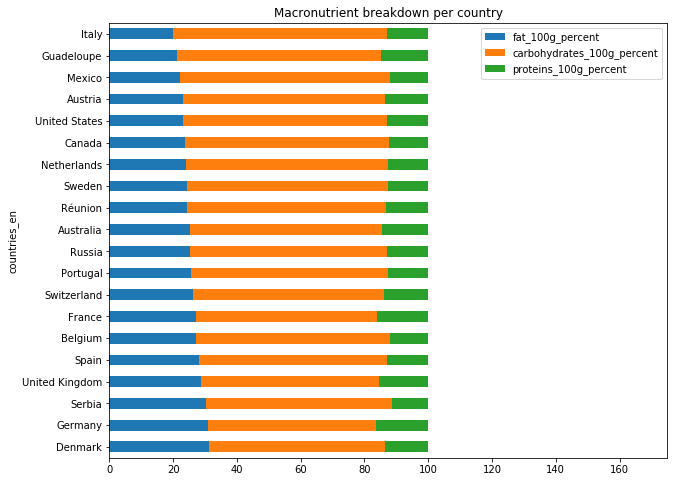

In [24]:
df_total.loc[:, 'fat_100g_percent':].plot.barh(stacked=True, figsize=[10, 8], title='Macronutrient breakdown per country')
plt.xlim([0, 175])
plt.show()